In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
# {"grid.color": ".6", "grid.linestyle": ":"}
sns.set(font_scale = 1.0)
sns.set_style(style = "white")

In [2]:
df = pd.read_csv('/data02/MyArchive/aisteer_3Dencoders/voids_paper_data/output_exp1.csv')

In [3]:
df['${1/r}$'] = 1.0/df['r_fac']
df['t_rec_gpu'] = df['t_filt'] + df['t_mask'] + df['t_backproj']
df['t_rec'] = df['t_cpu2gpu'] + df['t_rec_gpu'] + df['t_gpu2cpu']
df['speedup-rec-gpu'] = df['t_rec_gpu'].iloc[-1]/df['t_rec_gpu']
df['speedup-bp'] = df['t_backproj'].iloc[-1]/df['t_backproj']
df['speedup-rec-net'] = df['t_rec'].iloc[-1]/df['t_rec']

In [4]:
df

,r_fac,ntheta,nz,n,t_cpu2gpu,t_filt,t_mask,t_backproj,t_gpu2cpu,${1/r}$,t_rec_gpu,t_rec,speedup-rec-gpu,speedup-bp,speedup-rec-net
0,0.010000,1500.0,64.0,2048.0,80.629730,39.211006,14.622560,27.120031,8.970528,100.000000,80.953597,170.553855,33.706044,90.463044,20.869795
1,0.016681,1500.0,64.0,2048.0,80.287712,39.258114,14.750976,42.177727,8.291488,59.948425,96.186816,184.766016,28.367978,58.167208,19.264495
2,0.027826,1500.0,64.0,2048.0,80.103714,39.289665,15.041408,67.912643,13.757856,35.938137,122.243716,216.105287,22.321192,36.125241,16.470786
3,0.046416,1500.0,64.0,2048.0,80.281982,39.297153,15.555744,111.468765,40.331615,21.544347,166.321663,286.935261,16.405713,22.009400,12.404972
4,0.077426,1500.0,64.0,2048.0,80.232574,39.313377,20.733473,184.379425,67.971359,12.915497,244.426275,392.630209,11.163388,13.306043,9.065589
5,0.129155,1500.0,64.0,2048.0,80.817284,39.291679,32.608418,312.500610,95.231262,7.742637,384.400707,560.449253,7.098388,7.850739,6.351019
6,0.215443,1500.0,64.0,2048.0,80.650658,39.436192,52.439327,528.298645,188.286789,4.641589,620.174164,889.111610,4.399773,4.643890,4.003349
7,0.359381,1500.0,64.0,2048.0,80.772324,39.515488,86.460030,887.011536,259.562744,2.782559,1012.987053,1353.322121,2.693643,2.765872,2.630138
8,0.599484,1500.0,64.0,2048.0,80.536514,39.544064,143.265411,1480.062500,442.183685,1.668101,1662.871975,2185.592175,1.640911,1.657606,1.628586
9,1.000000,1500.0,64.0,2048.0,81.041405,39.727425,235.537445,2453.360596,749.757080,1.000000,2728.625465,3559.423950,1.000000,1.000000,1.000000


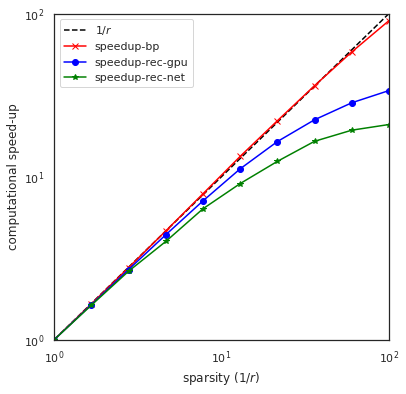

In [5]:
fig, ax = plt.subplots(1,1, figsize = (6,6))
labels = ['${1/r}$', 'speedup-bp', 'speedup-rec-gpu', 'speedup-rec-net']
colors = ['black', 'red', 'blue', 'green']
markers = ['--', 'x-', 'o-', '*-']

for iplot, label in enumerate(labels):
    ax.plot(df['${1/r}$'], df[label], markers[iplot], color = colors[iplot], label = label)
ax.set_xlabel("sparsity (${1/r}$)")
ax.set_ylabel("computational speed-up")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([1,100])
ax.set_ylim([1,100])
ax.legend()

In [6]:
df

,r_fac,ntheta,nz,n,t_cpu2gpu,t_filt,t_mask,t_backproj,t_gpu2cpu,${1/r}$,t_rec_gpu,t_rec,speedup-rec-gpu,speedup-bp,speedup-rec-net
0,0.010000,1500.0,64.0,2048.0,80.629730,39.211006,14.622560,27.120031,8.970528,100.000000,80.953597,170.553855,33.706044,90.463044,20.869795
1,0.016681,1500.0,64.0,2048.0,80.287712,39.258114,14.750976,42.177727,8.291488,59.948425,96.186816,184.766016,28.367978,58.167208,19.264495
2,0.027826,1500.0,64.0,2048.0,80.103714,39.289665,15.041408,67.912643,13.757856,35.938137,122.243716,216.105287,22.321192,36.125241,16.470786
3,0.046416,1500.0,64.0,2048.0,80.281982,39.297153,15.555744,111.468765,40.331615,21.544347,166.321663,286.935261,16.405713,22.009400,12.404972
4,0.077426,1500.0,64.0,2048.0,80.232574,39.313377,20.733473,184.379425,67.971359,12.915497,244.426275,392.630209,11.163388,13.306043,9.065589
5,0.129155,1500.0,64.0,2048.0,80.817284,39.291679,32.608418,312.500610,95.231262,7.742637,384.400707,560.449253,7.098388,7.850739,6.351019
6,0.215443,1500.0,64.0,2048.0,80.650658,39.436192,52.439327,528.298645,188.286789,4.641589,620.174164,889.111610,4.399773,4.643890,4.003349
7,0.359381,1500.0,64.0,2048.0,80.772324,39.515488,86.460030,887.011536,259.562744,2.782559,1012.987053,1353.322121,2.693643,2.765872,2.630138
8,0.599484,1500.0,64.0,2048.0,80.536514,39.544064,143.265411,1480.062500,442.183685,1.668101,1662.871975,2185.592175,1.640911,1.657606,1.628586
9,1.000000,1500.0,64.0,2048.0,81.041405,39.727425,235.537445,2453.360596,749.757080,1.000000,2728.625465,3559.423950,1.000000,1.000000,1.000000
